<center><h1>Saloni_Fnu_HW1</h1></center>
<br>
<center><font size="4">Vertebral Column Data</font></center>

Name: Fnu Saloni                                                      
USC-ID: 3175644840                                               
Github Username: fnusaloni

### (a) Download Data

Package imports

In [5]:
from scipy.io import arff
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score
from sklearn.covariance import EmpiricalCovariance
from tabulate import tabulate

Get the Vertebral Column Data Set

In [7]:
# loading an ARFF file
data, col = arff.loadarff('../../data/vertebral_column_data/column_2C_weka.arff')
data

array([( 63.0278175 , 22.55258597,  39.60911701,  40.47523153,  98.67291675, -2.54399986e-01, b'Abnormal'),
       ( 39.05695098, 10.06099147,  25.01537822,  28.99595951, 114.4054254 ,  4.56425864e+00, b'Abnormal'),
       ( 68.83202098, 22.21848205,  50.09219357,  46.61353893, 105.9851355 , -3.53031731e+00, b'Abnormal'),
       ( 69.29700807, 24.65287791,  44.31123813,  44.64413017, 101.8684951 ,  1.12115234e+01, b'Abnormal'),
       ( 49.71285934,  9.65207488,  28.317406  ,  40.06078446, 108.1687249 ,  7.91850062e+00, b'Abnormal'),
       ( 40.25019968, 13.92190658,  25.1249496 ,  26.32829311, 130.3278713 ,  2.23065173e+00, b'Abnormal'),
       ( 53.43292815, 15.86433612,  37.16593387,  37.56859203, 120.5675233 ,  5.98855070e+00, b'Abnormal'),
       ( 45.36675362, 10.75561143,  29.03834896,  34.61114218, 117.2700675 , -1.06758708e+01, b'Abnormal'),
       ( 43.79019026, 13.5337531 ,  42.69081398,  30.25643716, 125.0028927 ,  1.32890182e+01, b'Abnormal'),
       ( 36.68635286,  5.010

In [8]:
# making it more presentable
ds = pd.DataFrame(data)
ds
# getting the column names and then putting it to the dataframe
column_names = col.names() 

ds.columns = column_names
ds

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,b'Abnormal'
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,b'Abnormal'
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,b'Abnormal'
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,b'Abnormal'
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,b'Abnormal'
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,b'Normal'
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,b'Normal'
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,b'Normal'
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,b'Normal'


In [9]:
# converting b'Abnormal' to AB and b'Normal' to NO
ds['class'] = ds['class'].apply(lambda x: 'AB' if x == b'Abnormal' else 'NO')
ds

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,AB
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,AB
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,AB
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,AB
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,AB
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,NO
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,NO
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,NO
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,NO


### (b) Pre-Processing and Exploratory Data Analysis

#### i. Scatterplots

In [12]:
# Converting b'Abnormal' to AB and b'Normal' to NO
ds['class'] = ds['class'].apply(lambda x: 1 if x == 'AB' else 0)
ds

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0


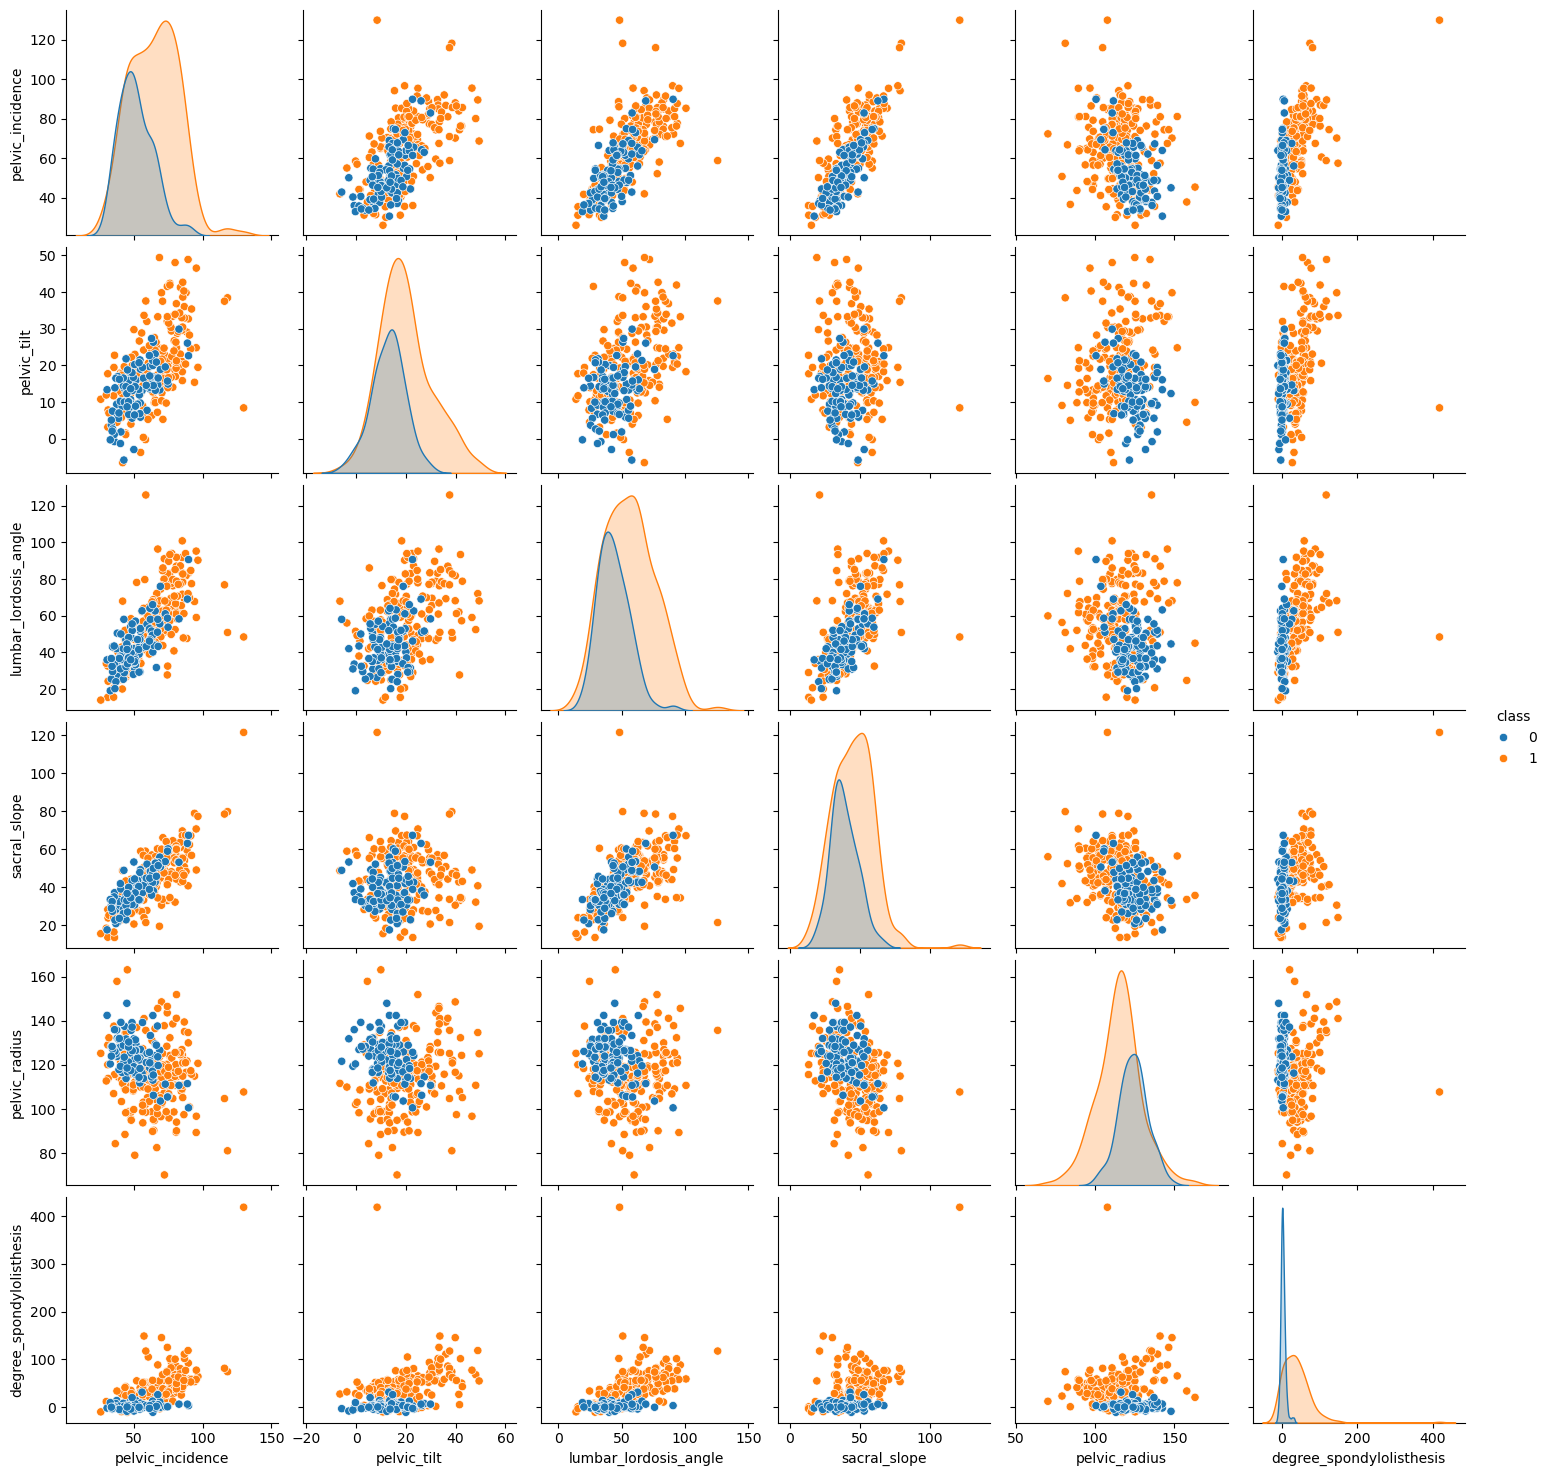

In [13]:
# creating a pairplot using Seaborn to visualize the relationships between all numerical variables in my dataset
sns.pairplot(ds, hue='class')
plt.show()

#### ii. Boxplots

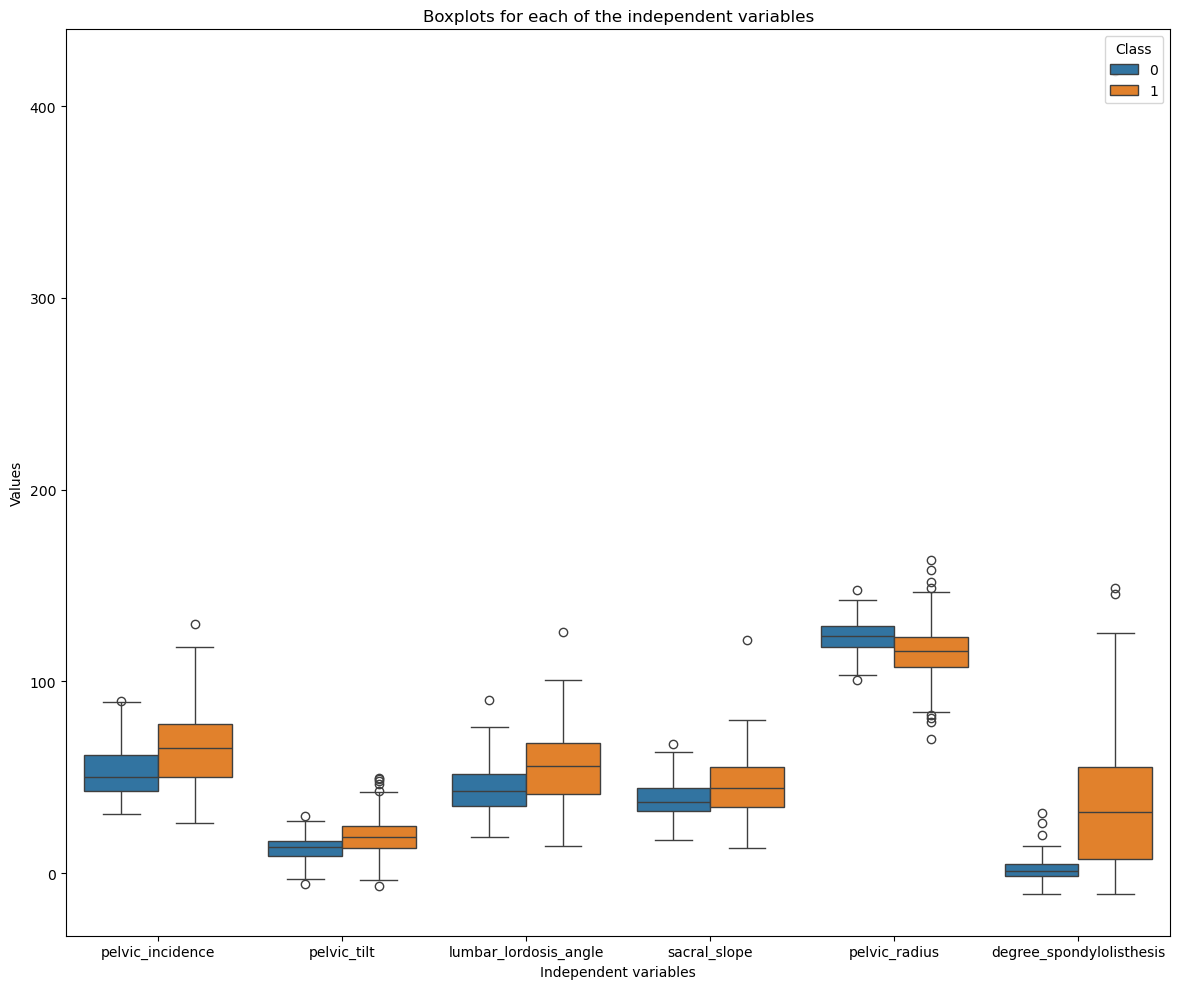

In [15]:
# creating boxplots for all independent variables in the dataset (ds), grouping by the class column to visualize the distribution of values across different classes
plt.figure(figsize=(12, 10))
# getting all the indeendent variables
independentVariable = [col for col in ds.columns if col != 'class']

graphData = pd.melt(ds, id_vars=['class'], value_vars=independentVariable, var_name='variable', value_name='value')
sns.boxplot(x='variable', y='value', hue='class', data=graphData)

plt.title('Boxplots for each of the independent variables')
plt.ylabel('Values')
plt.xlabel('Independent variables')
plt.legend(title='Class', loc='upper right') 
plt.tight_layout()
plt.show()

#### iii. Split Data Set

In [17]:
# selecting the first 70 rows of Class 0
class0Train = ds[ds['class'] == 0].iloc[:70]  
# selecting the first 140 rows of Class 1 as the training se
class1Train = ds[ds['class'] == 1].iloc[:140]  
trainDataset = pd.concat([class0Train, class1Train])  

# the rest of the data as the test set.
testDataset = ds.drop(trainDataset.index)

print("Shape of Training dataset:", trainDataset.shape)
print("Shape of Test dataset:", testDataset.shape)

Shape of Training dataset: (210, 7)
Shape of Test dataset: (100, 7)


In [18]:
testDataset

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
140,69.563486,15.401139,74.438497,54.162347,105.067356,29.701211,1
141,89.504947,48.903653,72.003423,40.601295,134.634291,118.353370,1
142,85.290173,18.278890,100.744220,67.011283,110.660701,58.884948,1
143,60.626217,20.595958,64.535262,40.030259,117.225554,104.859247,1
144,60.044177,14.309656,58.038865,45.734521,105.131664,30.409133,1
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0


### (c) Classification

#### i. Euclidean Metric

In [21]:
# given to us
kValue= np.arange(1, 209, 3) 
# splitting the dataset into X and Y
X_train, y_train = trainDataset.drop(columns=['class']), trainDataset['class']
X_test, y_test = testDataset.drop(columns=['class']), testDataset['class']

In [22]:
# training K-Nearest Neighbors (KNN) models with given k values using the Euclidean distance, and calculating the training and test errors
trainErrorList = []
testErrorList = []

for x in kValue:
    knnModel = KNeighborsClassifier(n_neighbors=x, metric='euclidean')  
    knnModel.fit(X_train, y_train)  

    y_trainPred = knnModel.predict(X_train)  
    y_testPred = knnModel.predict(X_test) 

    trainingError = np.mean(y_trainPred != y_train)  
    testingError = np.mean(y_testPred != y_test)  

    trainErrorList.append(trainingError)  
    testErrorList.append(testingError)

bestTrainingErrorEuclidean = min(trainErrorList)

#### ii. Test Data

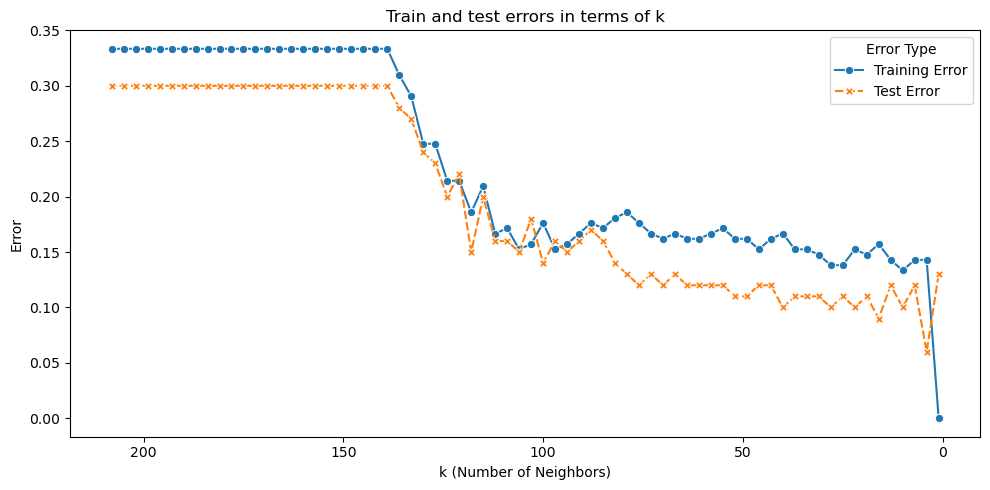

k*: 4
Confusion Matrix:
[[25  5]
 [ 1 69]]
True Positive Rate: 0.98571
True Negative Rate: 0.83333
Precision: 0.93243
F1-Score: 0.95833


In [24]:
# creating a DataFrame (plotData) to store k values along with their corresponding training and test errors
plotData = pd.DataFrame({
    'k': kValue, 
    'Training Error': trainErrorList, 
    'Test Error': testErrorList
})
# ploting train and test errors in terms of k for k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order)
plotDataAxis = plotData.melt(id_vars='k', var_name='Error Type', value_name='Error')

plt.figure(figsize=(10, 5))
plt.title('Train and test errors in terms of k')
sns.lineplot(x='k', y='Error', hue='Error Type', style='Error Type', markers=True, data=plotDataAxis)
plt.ylabel('Error')
plt.xlabel('k (Number of Neighbors)')
plt.gca().invert_xaxis()
plt.tight_layout()
plt.show()

# then finding the best kMin with the lowest test error, train a KNN model with Euclidean distance, making predictions, computing the confusion matrix, and calculating performance metrics
kMin = kValue[np.argmin(testErrorList)] 
knnModelMin = KNeighborsClassifier(n_neighbors=kMin, metric='euclidean')
knnModelMin .fit(X_train, y_train)

y_testPredMin = knnModelMin.predict(X_test)

confusionMatrix = confusion_matrix(y_test, y_testPredMin)

tn, fp, fn, tp = confusionMatrix.ravel()  


tpr = tp / (tp + fn)  
tnr = tn / (tn + fp)  

precision = tp / (tp + fp)  
f1 = (2 * precision * tpr) / (precision + tpr)  

print(f"k*: {kMin}")
print(f"Confusion Matrix:\n{confusionMatrix}")
print(f"True Positive Rate: {tpr:.5f}")
print(f"True Negative Rate: {tnr:.5f}")
print(f"Precision: {precision:.5f}")
print(f"F1-Score: {f1:.5f}")

#### iii. Learning Curve

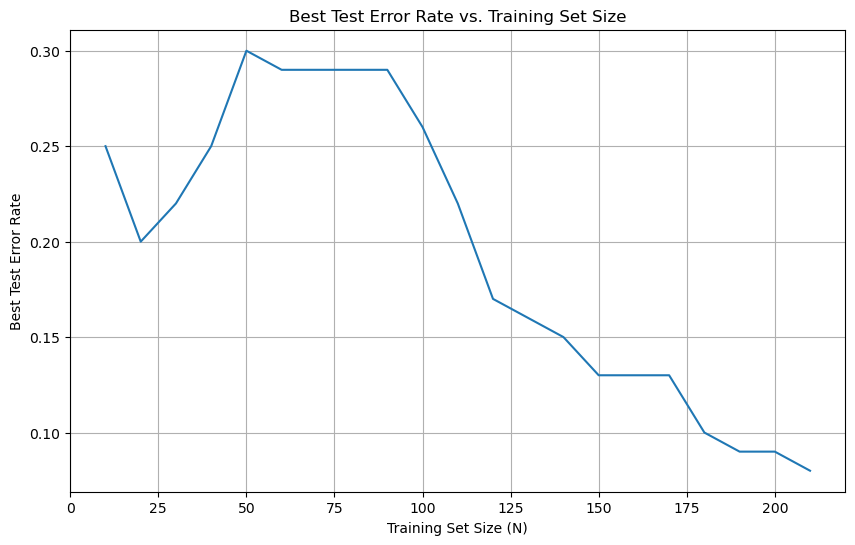

In [26]:
# size of training set is N ∈ {10,20,30,...,210}
trainingSetSize = range(10, 211, 10)

# creating an empty dataframe for storage
resultsLC = pd.DataFrame(columns=['Training Size', 'Best Test Error'])

# going over different training set sizes
for x in trainingSetSize:
    # selecting the training set by choosing the first ⌊N/3⌋ rows of Class 0
    class0Set = class0Train.iloc[:x // 3]
    # selecting the training set by choosing the first N − ⌊N/3⌋ rows of Class 1
    class1Set = class1Train.iloc[:x - (x // 3)]
    combineSet = pd.concat([class0Set, class1Set])

    X_train = combineSet.drop(columns='class')
    y_train = combineSet['class']
    
    # Also, for each N, selecting the optimal k from a set starting from k = 1, increasing by 5
    kValueForN = np.arange(1, x, 5)
    
    testErrorN = []
    # going over each k value and computing test errors
    for i in kValueForN:
        knnModel = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
        # FIT,PREDICT,CALCULATE
        knnModel.fit(X_train, y_train)
        
        y_testPred = knnModel.predict(X_test)
        
        testingError = np.mean(y_testPred != y_test)
        # storing the test error for the current k
        testErrorN.append(testingError)
    
    bestTestError = min(testErrorN)
    
    newData = pd.DataFrame({'Training Size': [x], 'Best Test Error': [bestTestError]})
    # adding the new data to the resultLC dataframe
    if resultsLC.empty:
        resultsLC = newData  
    else:
        resultsLC = pd.concat([resultsLC, newData], ignore_index=True)

# Plotting the best test error rate
plt.figure(figsize=(10, 6))
plt.ylabel('Best Test Error Rate')
plt.xlabel('Training Set Size (N)')
plt.plot(resultsLC["Training Size"], resultsLC["Best Test Error"])
plt.title('Best Test Error Rate vs. Training Set Size')
plt.grid()
plt.show()

### (d) Other Metrics

#### i. Minkowski Distance.

##### A. Manhattan Distance with p = 1.

In [67]:
# selecting the best k when {1,6,11,...,196}
kValueManhattan = np.arange(1, 197, 5)

resultsManhattan = []

# going through each k value and computing errors using Manhattan distance with p = 1
for k in kValueManhattan:
    knnManhattan = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=1)
    # FIT,PREDICT,CALCULATE
    knnManhattan.fit(X_train, y_train)

    y_testPredManhattan = knnManhattan.predict(X_test)
    y_trainPredManhattan = knnManhattan.predict(X_train)

    testErrorManhattan = np.mean(y_testPredManhattan != y_test)  
    trainErrorManhattan = np.mean(y_trainPredManhattan != y_train)
    # storing the test error for the current k
    resultsManhattan.append({'k': k, 'Test Error': testErrorManhattan, 'Training Error': trainErrorManhattan})

resultsManhattanDf = pd.DataFrame(resultsManhattan)

# getting the lowest test error
bestTestError = resultsManhattanDf['Test Error'].min()

# finding all k-values that have this lowest test error
bestKValues = resultsManhattanDf[resultsManhattanDf['Test Error'] == bestTestError].sort_values(by='k', ascending=False)
print(f"all k-values that have the lowest test error")
print(bestKValues[['k', 'Test Error']].to_string(index=False))

# selecting the best k-value
bestResultManhattan = resultsManhattanDf.sort_values(by=['Test Error', 'k'], ascending=[True, False]).iloc[0]

# getting the best k and its corresponding training error
bestKManhattan = bestResultManhattan['k']
bestTrainingErrorManhattan = bestResultManhattan['Training Error']

print(f"\n")
print(f"Best k* for Manhattan distance: {bestKManhattan}")
print(f"Lowest Test Error for Manhattan distance: {bestResultManhattan['Test Error']:.3f}")
print(f"Lowest Training Error for Manhattan distance: {bestTrainingErrorManhattan:.3f}")

all k-values that have the lowest test error
 k  Test Error
26        0.11
11        0.11
 6        0.11
 1        0.11


Best k* for Manhattan distance: 26.0
Lowest Test Error for Manhattan distance: 0.110
Lowest Training Error for Manhattan distance: 0.167


Here I'm going with Best k*= 26 because significantly higher k-values reduce data noise. Overfitting may result if k = 1, since the model only uses the closest neighbor.

##### B. With log10(p) in {0.1, 0.2, 0.3, ... ,1}.

In [33]:
# with log10(p) ∈ {0.1,0.2,0.3,...,1}
logPValues = np.arange(0.1, 1.1, 0.1)
# calculating p values meaning (10^log10(p))
pValues = 10 ** logPValues  

resultsLog = []

# going over each log10(p) value
for logP, p in zip(logPValues, pValues):
    knn = KNeighborsClassifier(n_neighbors=int(bestKManhattan), metric='minkowski', p=p)
    # FIT,PREDICT,CALCULATE
    knn.fit(X_train, y_train)

    y_testPredLog = knn.predict(X_test)
    y_trainPredLog = knn.predict(X_train)

    testErrorLog = np.mean(y_testPredLog != y_test)  
    training_error = np.mean(y_trainPredLog != y_train)
    # storing the result for the current log10(p) value
    resultsLog.append({'log10(p)': logP, 'Test Error': testErrorLog, 'Training Error': training_error})

resultsLogDf = pd.DataFrame(resultsLog)

# finding the lowest test error
minTestErrorLog = resultsLogDf['Test Error'].min()

bestPList = resultsLogDf[resultsLogDf['Test Error'] == minTestErrorLog]

# getting the best log10(p) value among the best test errors
bestResultLog = bestPList.sort_values(by='log10(p)', ascending=False).iloc[0]

# storing the best training error for the best log10(p)
bestTrainingErrorLog = bestResultLog['Training Error']

print(f"Best log10(p): {bestResultLog['log10(p)']:.3f}")
print(f"Best Test Error: {bestResultLog['Test Error']:.3f}")
print(f"Best Training Error: {bestResultLog['Training Error']:.3f}")

Best log10(p): 0.600
Best Test Error: 0.100
Best Training Error: 0.138


##### C. Chebyshev Distance With p -> infinity.

In [35]:
kValueChebyshev = np.arange(1, 197, 5)

resultsChebyshev = []

# going through each k value and computing errors using Chebyshev distance p = infinity
for k in kValueChebyshev:
    knnChebyshev = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=np.inf)  
    # FIT,PREDICT,CALCULATE
    knnChebyshev.fit(X_train, y_train)

    y_testPredChebyshev = knnChebyshev.predict(X_test)
    y_trainPredChebyshev = knnChebyshev.predict(X_train)

    testErrorChebyshev = np.mean(y_testPredChebyshev != y_test)
    trainErrorChebyshev = np.mean(y_trainPredChebyshev != y_train)

    # storing results for current k 
    resultsChebyshev.append({'k': k, 'Test Error': testErrorChebyshev, 'Training Error': trainErrorChebyshev})

resultsChebyshevDf = pd.DataFrame(resultsChebyshev)

# selecting the best k-value among the test errors
bestResultChebyshev = resultsChebyshevDf.sort_values(by=['Test Error', 'k'], ascending=[True, False]).iloc[0]

# storing the best k-value and its corresponding training error
bestKChebyshev = bestResultChebyshev['k']
bestTrainingErrorChebyshev = bestResultChebyshev['Training Error']

print(f"Best k* for Chebyshev distance: {bestKChebyshev:.3f}")
print(f"Lowest Test Error for Chebyshev distance: {bestResultChebyshev['Test Error']:.3f}")
print(f"Lowest Training Error for Chebyshev distance: {bestResultChebyshev['Training Error']:.3f}")

Best k* for Chebyshev distance: 16.000
Lowest Test Error for Chebyshev distance: 0.080
Lowest Training Error for Chebyshev distance: 0.148


#### ii. Mahalanobis Distance.

In [37]:
kValueMahalanobis = np.arange(1, 197, 5)

# computing the covariance matrix of the training data
covariance_matrix = np.cov(X_train.T)  
# computing the inverse of the covariance matrix for Mahalanobis distance
inverse_covariance_matrix = np.linalg.inv(covariance_matrix)  

resultsMahalanobis = []

# going through each k value and computing errors using Mahalanobis distance
for k in kValueMahalanobis:
    knnMahalanobis = KNeighborsClassifier(n_neighbors=int(k), metric='mahalanobis', metric_params={'VI': inverse_covariance_matrix})
    # FIT,PREDICT,CALCULATE
    knnMahalanobis.fit(X_train, y_train)

    y_testPredMahalanobis = knnMahalanobis.predict(X_test)
    y_trainPredMahalanobis = knnMahalanobis.predict(X_train)

    testErrorMahalanobis = np.mean(y_testPredMahalanobis != y_test) 
    trainErrorMahalanobis = np.mean(y_trainPredMahalanobis != y_train)

    # storing results for current k 
    resultsMahalanobis.append({'k': k, 'Test Error': testErrorMahalanobis, 'Training Error': trainErrorMahalanobis})

resultsMahalanobisDf = pd.DataFrame(resultsMahalanobis)
resultsMahalanobisDf = resultsMahalanobisDf.sort_values(by='k', ascending=True)


# finding the unique test errors and sorting them
uniqueTestErr = resultsMahalanobisDf['Test Error'].unique()
uniqueTestErr.sort()

# ensuring there are at least two unique test error values
if len(uniqueTestErr) > 1:
    secondLowestTestError = uniqueTestErr[1] 
else:
    secondLowestTestError = uniqueTestErr[0]  

# finding all k-values with the second lowest test error
bestKValues = resultsMahalanobisDf[resultsMahalanobisDf['Test Error'] == secondLowestTestError].sort_values(by='k', ascending=True)

# selecting the smallest valid k-value from this list
bestResultMahalanobis = bestKValues.iloc[0]  

# getting the best k-value and its corresponding training error
bestKMahalanobis = bestResultMahalanobis['k']
bestTrainingErrorMahalanobis = bestResultMahalanobis['Training Error']

print(f"Best k* for Mahalanobis distance: {bestKMahalanobis:.3f}")
print(f"Test Error for Mahalanobis distance: {bestResultMahalanobis['Test Error']:.3f}")
print(f"Training Error for Mahalanobis distance: {bestTrainingErrorMahalanobis:.3f}")


Best k* for Mahalanobis distance: 6.000
Test Error for Mahalanobis distance: 0.160
Training Error for Mahalanobis distance: 0.133


summarize the test errors for the best k values (k*) of Manhattan, Minkowski (Best log(p)), Chebyshev, and Mahalanobis

In [39]:
# creatong a summary of test errors for different distance metrics
test_error_summary = [
    {'Distance Metric': 'Manhattan', 'Best k*': bestKManhattan, 'Test Error': bestResultManhattan['Test Error']},
    {'Distance Metric': 'Minkowski (Best log(p))', 'Best k*': bestKManhattan, 'Test Error': bestResultLog['Test Error']},
    {'Distance Metric': 'Chebyshev', 'Best k*': bestKChebyshev, 'Test Error': bestResultChebyshev['Test Error']},
    {'Distance Metric': 'Mahalanobis', 'Best k*': bestKMahalanobis, 'Test Error': bestResultMahalanobis['Test Error']}
]

# printing the table
table = tabulate(test_error_summary, headers="keys", tablefmt="github", floatfmt=".3f")
print(table)

| Distance Metric         |   Best k* |   Test Error |
|-------------------------|-----------|--------------|
| Manhattan               |    26.000 |        0.110 |
| Minkowski (Best log(p)) |    26.000 |        0.100 |
| Chebyshev               |    16.000 |        0.080 |
| Mahalanobis             |     6.000 |        0.160 |


### (e) Weighted Decision

In [41]:
# reporting the best test errors when k ∈ {1,6,11,16,...,196}.
kValuesWeighted = np.arange(1, 197, 5)


metricsType = {'Euclidean': ('minkowski', 2), 
                    'Manhattan': ('minkowski', 1), 
                    'Chebyshev': ('chebyshev', None)}

resultsWeighted = []

# going through each distance metric
for metricName, (distanceMetric, pValue) in metricsType.items():
    metricResults = []  
# going through each k-value
    for k in kValuesWeighted:
        knn = KNeighborsClassifier(n_neighbors=int(k), metric=distanceMetric, p=pValue, weights='distance')
        # FIT,PREDICT,CALCULATE
        knn.fit(X_train, y_train)

        y_test_pred = knn.predict(X_test)
        y_train_pred = knn.predict(X_train)

        test_error = np.mean(y_test_pred != y_test)
        train_error = np.mean(y_train_pred != y_train)

        # storing results for current k
        metricResults.append({'Distance Metric': metricName, 'k': k, 'Test Error': test_error, 'Train Error': train_error})

    metricResultsDf = pd.DataFrame(metricResults)

    bestTestError = metricResultsDf['Test Error'].min()
    
    # selecting the best k-value 
    bestK = metricResultsDf[metricResultsDf['Test Error'] == bestTestError].sort_values(by='k', ascending=False).iloc[-1]['k']

    # selecting the best result based on the best k 
    bestResult = metricResultsDf[metricResultsDf['k'] == bestK].iloc[0]
    # storing the best results
    resultsWeighted.append({
    'Distance Metric': metricName,
    'Best Train Error': bestResult['Train Error'],  
    'Best Test Error': bestTestError,
    'Best K': bestK
})

resultsWeightedDf = pd.DataFrame(resultsWeighted)
resultsWeightedDf

,Distance Metric,Best Train Error,Best Test Error,Best K
0,Euclidean,0.0,0.10,6
1,Manhattan,0.0,0.10,26
2,Chebyshev,0.0,0.11,16


### (f) Training Error Rate

In [69]:
# getting the training errors from the weighted voting results
weightedTrainingErrors = [
    {'Distance Metric': result['Distance Metric'], 'Training Error': result['Best Train Error']}
    for result in resultsWeighted
]

# creating a list of training errors for the computed distance metrics
trainingErrors = [
    {'Distance Metric': 'Euclidean', 'Training Error': bestTrainingErrorEuclidean},
    {'Distance Metric': 'Manhattan', 'Training Error': bestTrainingErrorManhattan},
    {'Distance Metric': 'Best log(p)', 'Training Error': bestTrainingErrorLog},
    {'Distance Metric': 'Chebyshev', 'Training Error': bestTrainingErrorChebyshev},
    {'Distance Metric': 'Mahalanobis', 'Training Error': bestTrainingErrorMahalanobis},
    *weightedTrainingErrors
]

# showing the results in the table format
table = tabulate(trainingErrors, headers="keys", tablefmt="github", floatfmt=".3f")
print(table)

| Distance Metric   |   Training Error |
|-------------------|------------------|
| Euclidean         |            0.000 |
| Manhattan         |            0.167 |
| Best log(p)       |            0.138 |
| Chebyshev         |            0.148 |
| Mahalanobis       |            0.133 |
| Euclidean         |            0.000 |
| Manhattan         |            0.000 |
| Chebyshev         |            0.000 |


When k=1 for the Euclidean distance metric, the only neighbor is the data point itself, resulting in the lowest training error rate of 0.0 for this assignment.

## References-:                                            
a)https://www.geeksforgeeks.org/reading-an-arff-file-to-pandas-dataframe/                                    
b)https://seaborn.pydata.org/generated/seaborn.pairplot.html                        
c)https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html
d)https://seaborn.pydata.org/generated/seaborn.boxplot.html                               
e)https://scikitlearn.org/0.15/modules/generated/sklearn.neighbors.KNeighborsClassifier.html                f)https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions                  
g)https://www.analyticsvidhya.com/blog/2020/02/4-types-of-distance-metrics-in-machine-learning/   h)https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html        i)https://numpy.org/doc/stable/reference/generated/numpy.cov.html                                    j)https://www.geeksforgeeks.org/introduction-to-python-tabulate-library/                                                                                                        k)https://www.geeksforgeeks.org/weighted-k-nn/     